In [40]:
## Calculate WAR

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [41]:
## open data file
xfpts_csv = "../data/fantrax_data/no_min_requirement.xFpts_epl_2019_2020.csv"
xfpts_df = pd.read_csv(xfpts_csv)

weekly_xfpts_csv = "../data/fantrax_data/weekly_data.no_min_requirement.xFpts_epl_2019_2020.csv"
weekly_xfpts_df = pd.read_csv(weekly_xfpts_csv)

num_sample = 5000

In [42]:
## get avg team 3-4-3 10 team league
# SAMPLING METHOD no distribution
# gather data to sample from

#try including elite players in starters


## FWDS

fwd_starters = list(xfpts_df.loc[(xfpts_df['Position'] == 'F') & (xfpts_df['n'] >= 10)].sort_values(by = 'mean_xFpts', ascending = False)[0:50]['Player'])
print("Forward starters: \n", fwd_starters)
fwd_starter_game_scores = weekly_xfpts_df.loc[(weekly_xfpts_df['Player'].isin(fwd_starters))]['xFpts']
fwd_ww = list(xfpts_df.loc[(xfpts_df['Position'] == 'F') & (xfpts_df['n'] >= 5)].sort_values(by = 'mean_xFpts', ascending = False)[45:65]['Player'])
print("Forward ww: \n", fwd_ww)
fwd_ww_game_scores = weekly_xfpts_df.loc[(weekly_xfpts_df['Player'].isin(fwd_ww))]['xFpts']

## MIDS
mid_starters = list(xfpts_df.loc[(xfpts_df['Position'] == 'M') & (xfpts_df['n'] >= 10)].sort_values(by = 'mean_xFpts', ascending = False)[0:60]['Player'])
print("Mid starters: \n", mid_starters)
mid_starter_game_scores = weekly_xfpts_df.loc[(weekly_xfpts_df['Player'].isin(mid_starters))]['xFpts']
mid_ww = list(xfpts_df.loc[(xfpts_df['Position'] == 'M') & (xfpts_df['n'] >= 5)].sort_values(by = 'mean_xFpts', ascending = False)[55:75]['Player'])
print("Mid ww: \n", mid_ww)
mid_ww_game_scores = weekly_xfpts_df.loc[(weekly_xfpts_df['Player'].isin(mid_ww))]['xFpts']

## DEF
def_starters = list(xfpts_df.loc[(xfpts_df['Position'] == 'D') & (xfpts_df['n'] >= 10)].sort_values(by = 'mean_xFpts', ascending = False)[0:50]['Player'])
print("Def starters: \n",def_starters)
def_starter_game_scores = weekly_xfpts_df.loc[(weekly_xfpts_df['Player'].isin(def_starters))]['xFpts']
def_ww = list(xfpts_df.loc[(xfpts_df['Position'] == 'D') & (xfpts_df['n'] >= 5)].sort_values(by = 'mean_xFpts', ascending = False)[45:65]['Player'])
print("Def ww: \n",def_ww)
def_ww_game_scores = weekly_xfpts_df.loc[(weekly_xfpts_df['Player'].isin(def_ww))]['xFpts']


Forward starters: 
 ['Adama Traore', 'Gabriel Jesus', 'Sadio Mane', 'Mohamed Salah', 'Allan Saint-Maximin', 'Willian', 'Raheem Sterling', 'Marcus Rashford', 'Christian Benteke', 'Sergio Aguero', 'Raul Jimenez', 'Son Heung-Min', 'Jarrod Bowen', 'Nicolas Pepe', 'Gerard Deulofeu', 'Sebastien Haller', 'Roberto Firmino', 'Troy Deeney', 'Jamie Vardy', 'Wilfried Zaha', 'Danny Ings', 'Joshua King', 'Olivier Giroud', 'Anthony Martial', 'Harry Kane', 'Dwight McNeil', 'Tammy Abraham', 'David McGoldrick', 'Ismaila Sarr', 'Richarlison', 'Pierre-Emerick Aubameyang', 'Oliver McBurnie', 'Dominic Calvert-Lewin', 'Ayoze Perez', 'Shane Long', 'Mason Greenwood', 'Alexandre Lacazette', 'Steven Alzate', 'Jordan Ayew', 'Andriy Yarmolenko', 'Chris Wood', 'Teemu Pukki', 'Jay Rodriguez', 'Joelinton', 'Neal Maupay', 'Dwight Gayle', 'Kelechi Iheanacho', 'Theo Walcott', 'Che Adams', 'Bukayo Saka']
Forward ww: 
 ['Pedro Neto', 'Jay Rodriguez', 'Joelinton', 'Neal Maupay', 'Danny Welbeck', 'Eddie Nketiah', 'Dwight Ga

Text(0.5, 1.0, 'Forwards')

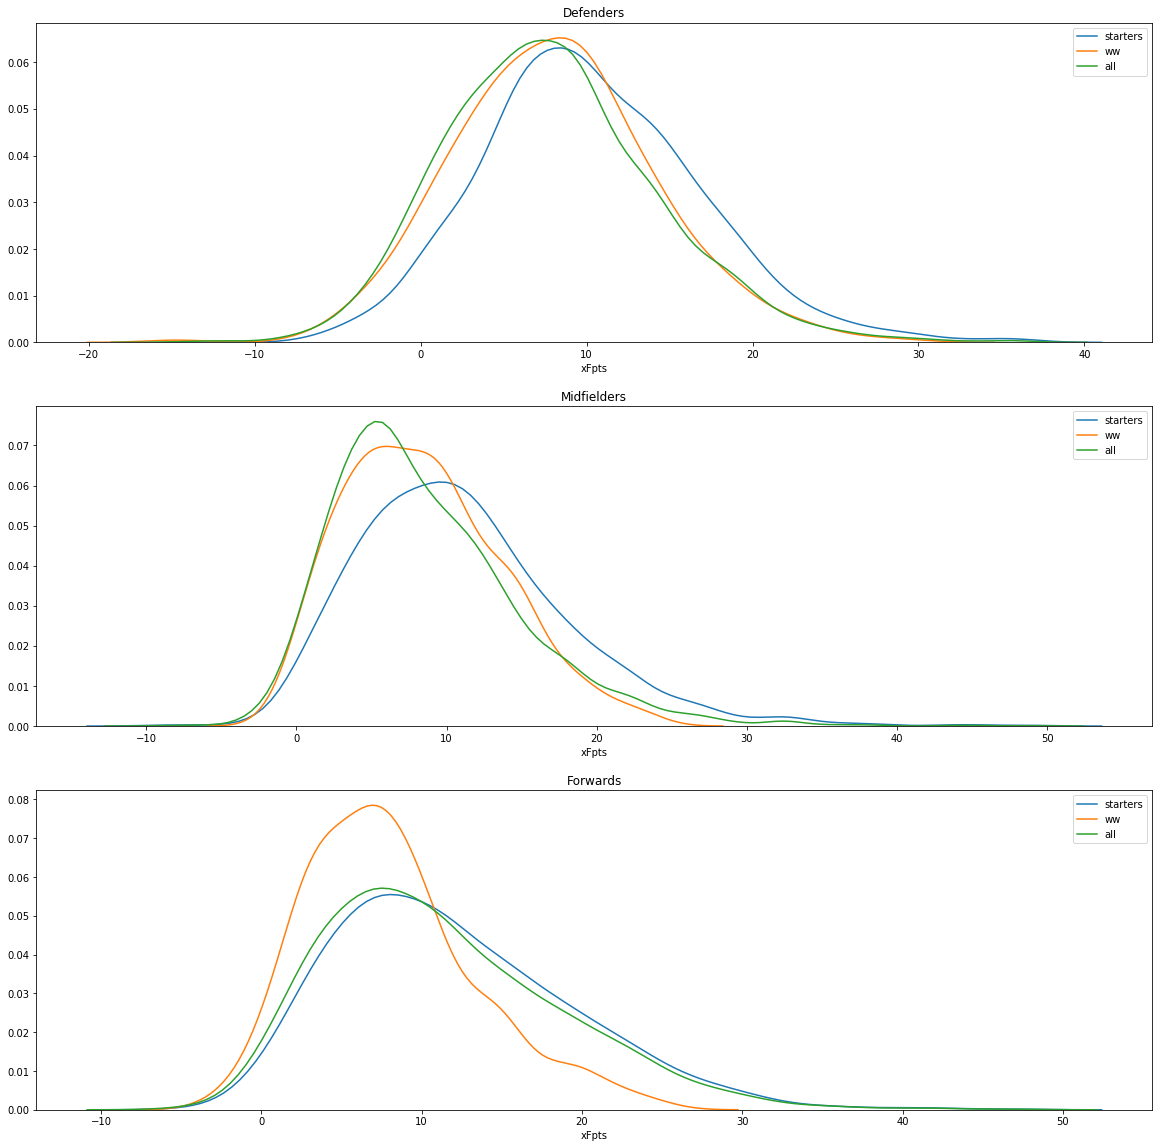

In [43]:
## plot the distributions with elite players
fig, ax = plt.subplots(3, 1, figsize = (20, 20))

sns.distplot(ax = ax[0], a = def_starter_game_scores, label = 'starters', hist = False)
sns.distplot(ax = ax[0], a = def_ww_game_scores, label = 'ww', hist = False)
sns.distplot(ax = ax[0], a = weekly_xfpts_df.loc[(weekly_xfpts_df['Position'] == 'D')]['xFpts'], label = 'all', hist = False)
ax[0].legend(loc = 'upper right')
ax[0].set_title("Defenders")
sns.distplot(ax = ax[1], a = mid_starter_game_scores, label = 'starters', hist = False)
sns.distplot(ax = ax[1], a = mid_ww_game_scores, label = 'ww', hist = False)
sns.distplot(ax = ax[1], a = weekly_xfpts_df.loc[(weekly_xfpts_df['Position'] == 'M')]['xFpts'], label = 'all', hist = False)
ax[1].legend(loc = 'upper right')
ax[1].set_title("Midfielders")
sns.distplot(ax = ax[2], a = fwd_starter_game_scores, label = 'starters', hist = False)
sns.distplot(ax = ax[2], a = fwd_ww_game_scores, label = 'ww', hist = False)
sns.distplot(ax = ax[2], a = weekly_xfpts_df.loc[(weekly_xfpts_df['Position'] == 'F')]['xFpts'], label = 'all', hist = False)
ax[2].legend(loc = 'upper right')
ax[2].set_title("Forwards")

109.76951600000001
22.035859265427884
109.19999999999999
5000


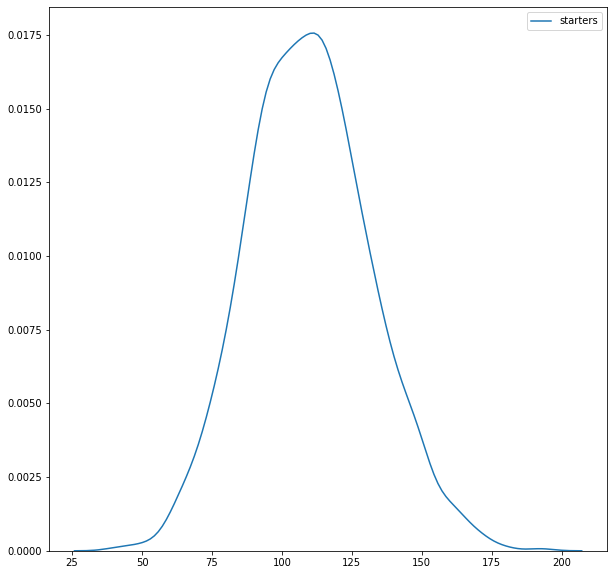

In [44]:
### Average Starter team sampling
avg_game = []
positions_possible = ['D', 'M', 'F']
missing_def_game = []
missing_mid_game = []
missing_fwd_game = []
for sample in range(num_sample):
    
    def_players = 2
    mid_players = 3
    fwd_players = 2
    
    def_pts = np.sum(def_starter_game_scores.sample(n=def_players))
    mid_pts = np.sum(mid_starter_game_scores.sample(n=mid_players))
    fwd_pts = np.sum(fwd_starter_game_scores.sample(n=fwd_players))
    temp_pts = def_pts + mid_pts + fwd_pts
    rest_pts = 0.0
    
    extra_def_game = def_starter_game_scores.sample(n=1)
    extra_mid_game = mid_starter_game_scores.sample(n=1)
    extra_fwd_game = fwd_starter_game_scores.sample(n=1)
    
    for pos in positions_possible:
        ## DEF EXCLUDED
        if pos == 'D':
            rest_pts = float(extra_mid_game) + float(extra_fwd_game)
            missing_def_game.append(float(temp_pts + rest_pts))
            avg_game.append(float(temp_pts + rest_pts + extra_def_game))
        ## MID EXCLUDED
        elif pos == 'M':
            rest_pts = float(extra_def_game) + float(extra_fwd_game)
            missing_mid_game.append(float(temp_pts + rest_pts))
        ## FWD EXCLUDED
        elif pos == 'F':
            rest_pts = float(extra_def_game) + float(extra_mid_game)
            missing_fwd_game.append(float(temp_pts + rest_pts))
    

print(np.mean(avg_game))
print(np.std(avg_game))
print(np.median(avg_game))
print(len(avg_game))
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

sns.distplot(ax = ax, a = avg_game, label = 'starters', hist = False)
ax.legend(loc = 'upper right')


In [45]:
### Average WW sampling for 1 player missing

def_avg_game = []
mid_avg_game = []
fwd_avg_game = []
for sample in range(num_sample):
    
    # Sample WW guys
    def_ww_pts = float(def_ww_game_scores.sample(n=1))
    mid_ww_pts = float(mid_ww_game_scores.sample(n=1))
    fwd_ww_pts = float(fwd_ww_game_scores.sample(n=1))
    
    # Gather avg points for simulated game with each player missing
    missing_def_pts = missing_def_game[sample]
    missing_mid_pts = missing_mid_game[sample]
    missing_fwd_pts = missing_fwd_game[sample]
    
    ## DEF
    missing_def_pts += def_ww_pts
    def_avg_game.append(missing_def_pts)
    
    ## MID
    missing_mid_pts += mid_ww_pts
    mid_avg_game.append(missing_mid_pts)
    
    ## FWD
    missing_fwd_pts += fwd_ww_pts
    fwd_avg_game.append(missing_fwd_pts)
   
## Average games are now generated. Determine the probability of winning for each
# DEF
def_ww_diff = np.array(def_avg_game) - np.array(avg_game)
win_count = 0
for d in def_ww_diff:
    if d > 0:
        win_count += 1
def_ww_war = (win_count / num_sample) - 0.5

# MID
mid_ww_diff = np.array(mid_avg_game) - np.array(avg_game)
win_count = 0
for d in mid_ww_diff:
    if d > 0:
        win_count += 1
mid_ww_war = (win_count / num_sample) - 0.5

# FWD
fwd_ww_diff = np.array(fwd_avg_game) - np.array(avg_game)
win_count = 0
for d in fwd_ww_diff:
    if d > 0:
        win_count += 1
fwd_ww_war = (win_count / num_sample) - 0.5

## results

print('Mean def ww game score: ', np.mean(def_avg_game))
print('std def ww game score: ', np.std(def_avg_game))
print("DEF avg war lost: ", def_ww_war)

print('Mean mid ww game score: ', np.mean(mid_avg_game))
print('std mid ww game score: ', np.std(mid_avg_game))
print("MID avg war lost: ", mid_ww_war)

print('Mean fwd ww game score: ', np.mean(fwd_avg_game))
print('std fwd ww game score: ', np.std(fwd_avg_game))
print("FWD avg war lost: ", fwd_ww_war)   


Mean def ww game score:  107.76178600000001
std def ww game score:  21.8977352461437
DEF avg war lost:  -0.09039999999999998
Mean mid ww game score:  107.280212
std mid ww game score:  21.2962093921678
MID avg war lost:  -0.10659999999999997
Mean fwd ww game score:  105.98299600000001
std fwd ww game score:  21.421240405354308
FWD avg war lost:  -0.15460000000000002


95.794611
24.117917571147785
93.815
10000


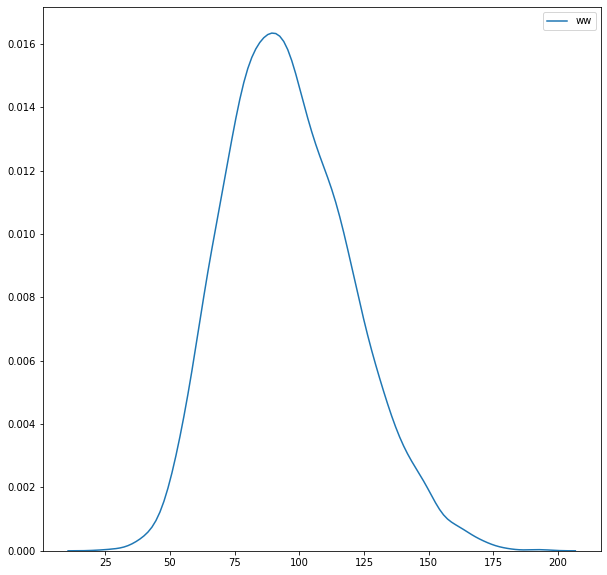

In [47]:
### Average WW team sampling
avg_ww_game = []
positions_possible = ['D', 'M', 'F']
missing_def_game = []
missing_mid_game = []
missing_fwd_game = []
for sample in range(num_sample):
    
    def_players = 2
    mid_players = 3
    fwd_players = 2
    
    def_pts = np.sum(def_ww_game_scores.sample(n=def_players))
    mid_pts = np.sum(mid_ww_game_scores.sample(n=mid_players))
    fwd_pts = np.sum(fwd_ww_game_scores.sample(n=fwd_players))
    temp_pts = def_pts + mid_pts + fwd_pts
    rest_pts = 0.0
    
    extra_def_game = def_ww_game_scores.sample(n=1)
    extra_mid_game = mid_ww_game_scores.sample(n=1)
    extra_fwd_game = fwd_ww_game_scores.sample(n=1)
    
    for pos in positions_possible:
        ## DEF EXCLUDED
        if pos == 'D':
            rest_pts = float(extra_mid_game) + float(extra_fwd_game)
            missing_def_game.append(float(temp_pts + rest_pts))
            avg_game.append(float(temp_pts + rest_pts + extra_def_game))
        ## MID EXCLUDED
        elif pos == 'M':
            rest_pts = float(extra_def_game) + float(extra_fwd_game)
            missing_mid_game.append(float(temp_pts + rest_pts))
        ## FWD EXCLUDED
        elif pos == 'F':
            rest_pts = float(extra_def_game) + float(extra_mid_game)
            missing_fwd_game.append(float(temp_pts + rest_pts))
    

print(np.mean(avg_game))
print(np.std(avg_game))
print(np.median(avg_game))
print(len(avg_game))
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

sns.distplot(ax = ax, a = avg_game, label = 'ww', hist = False)
ax.legend(loc = 'upper right')


In [46]:
## For all players SAMPLING procedure
player_dict = {}
for index, row in xfpts_df.iterrows():
    print(index)
    player = row['Player']
    pos = row['Position']
    games = row['n']
    player_weekly_pts = weekly_xfpts_df.loc[(weekly_xfpts_df['Player'] == player)]['xFpts']
    def_count = 3
    mid_count = 4
    fwd_count = 3
    if pos == 'D':
        def_count -= 1
        rot_average_list = missing_def_game
        ww_war = def_ww_war
    elif pos == 'M':
        mid_count -= 1
        rot_average_list = missing_mid_game
        ww_war = mid_ww_war
    elif pos == 'F':
        fwd_count -= 1
        rot_average_list = missing_fwd_game
        ww_war = fwd_ww_war

    
    sim_games = []
    
    player_samples = player_weekly_pts.sample(n = num_sample, replace = True)
    sim_games = np.array(player_samples) + np.array(rot_average_list)
    #ww_games = []
    sim_games_mean = np.mean(sim_games)
    sim_games_sd = np.std(sim_games)
    diff = np.array(sim_games) - np.array(avg_game)
    #ww_diff = np.array(ww_games) - np.array(avg_game)
    win_count = 0
    for d in diff:
        if d > 0:
            win_count += 1
    player_war = (win_count / num_sample) - 0.5
    if player == 'Kevin De Bruyne':
        print(sim_games_mean)
        print(sim_games_sd)
        print(player_war)
    '''
    ww_win_count = 0
    for d in ww_diff:
        if d > 0:
            ww_win_count += 1
    ww_war = (ww_win_count / num_sample) - 0.5
    '''
    total_war_won = player_war * games
    total_ww_war_lost = ww_war * (38 - games)
    total_player_war = total_war_won + total_ww_war_lost
    player_dict[player] = [pos, player_war, total_war_won, ww_war, total_ww_war_lost, total_player_war]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
119.05768799999998
22.538479426408873
0.3052
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
2

In [48]:
## convert player dict to pandas df
df = pd.DataFrame.from_dict(player_dict, orient='index', columns = ['Pos', 'avg_war_won', 'total_war_won', 'pos_war_lost', 'total_war_lost', 'total_player_war'])

df = df.sort_values(by = 'total_player_war', ascending = False)

df.to_csv("player_war_trial_elite_included_ww.csv")

In [ ]:
## DEPRECATED BELOW THIS POINT
print(np.mean(avg_game))


In [8]:
### Average Starter team sampling
## DEPRECATED ##
avg_game = []

for sample in range(num_sample):
    def_pts = np.sum(def_starter_game_scores.sample(n=3))
    mid_pts = np.sum(mid_starter_game_scores.sample(n=4))
    fwd_pts = np.sum(fwd_starter_game_scores.sample(n=3))
    total_pts = def_pts + mid_pts + fwd_pts
    avg_game.append(total_pts)

print(np.mean(avg_game))
print(np.std(avg_game))

print(len(avg_game))

100.83950800000001
20.45975836313655
5000


100.006976
19.710718005578183
99.4
5000


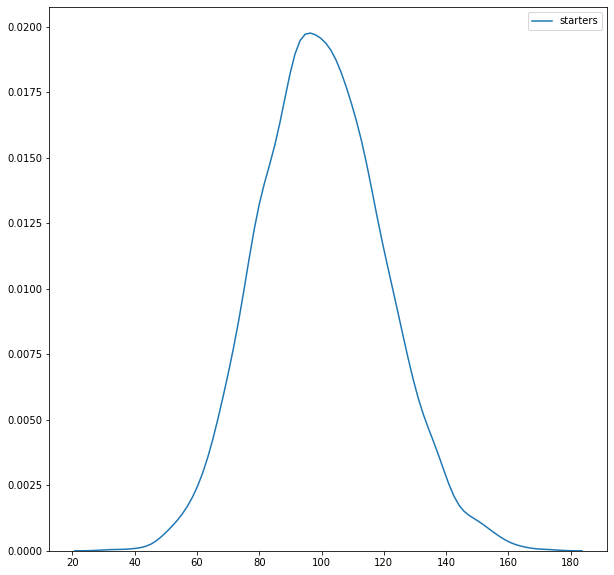

In [20]:
### Average Starter team sampling

## DEPRECATED ##
avg_game = []
avg_game_pos_missed = []
ww_players = 0
positions_possible = ['D', 'M', 'F']

for sample in range(num_sample):
    
    def_players = 3
    mid_players = 4
    fwd_players = 3
    ww_pts = 0
    pos_missed = random.sample(positions_possible, ww_players)
    avg_game_pos_missed.append(pos_missed)
    for pos in pos_missed:
        if pos == 'D':
            def_players -= 1
            ww_pts += float(def_ww_game_scores.sample(n=1))
        elif pos == 'M':
            mid_players -= 1
            ww_pts += float(mid_ww_game_scores.sample(n=1))
        elif pos == 'F':
            fwd_players -= 1
            ww_pts += float(fwd_ww_game_scores.sample(n=1))
    
    def_pts = np.sum(def_starter_game_scores.sample(n=def_players))
    mid_pts = np.sum(mid_starter_game_scores.sample(n=mid_players))
    fwd_pts = np.sum(fwd_starter_game_scores.sample(n=fwd_players))
    
    #def_ww_pts = def_ww_game_scores.sample(n=1)
    #mid_ww_pts = mid_ww_game_scores.sample(n=1)
    #fwd_ww_pts = fwd_ww_game_scores.sample(n=1)
    #total_pts = def_pts + mid_pts + fwd_pts + def_ww_pts + mid_ww_pts + fwd_ww_pts
    total_pts = def_pts + mid_pts + fwd_pts + ww_pts
    avg_game.append(total_pts)
    

print(np.mean(avg_game))
print(np.std(avg_game))
print(np.median(avg_game))
print(len(avg_game))
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

sns.distplot(ax = ax, a = avg_game, label = 'starters', hist = False)
ax.legend(loc = 'upper right')

In [21]:
### Average WW sampling for 1 player missing ## DEPRECATED
## DEF
def_avg_game = []
missing_def_game = []
for sample in range(num_sample):
    pos_missed = avg_game_pos_missed[sample]
    def_pts = np.sum(def_starter_game_scores.sample(n=2))
    mid_pts = np.sum(mid_starter_game_scores.sample(n=4))
    fwd_pts = np.sum(fwd_starter_game_scores.sample(n=3))
    total_pts = def_pts + mid_pts + fwd_pts
    missing_def_game.append(total_pts)
    def_ww_pts = float(def_ww_game_scores.sample(n=1))
    total_pts += def_ww_pts
    def_avg_game.append(total_pts)
def_ww_diff = np.array(def_avg_game) - np.array(avg_game[0:num_sample])
win_count = 0
for d in def_ww_diff:
    if d > 0:
        win_count += 1
def_ww_war = (win_count / num_sample) - 0.5
print('Mean def ww game score: ', np.mean(def_avg_game))
print('std def ww game score: ', np.std(def_avg_game))
print("DEF avg war lost: ", def_ww_war)
## MID
mid_avg_game = []
missing_mid_game = []
for sample in range(num_sample):
    def_pts = np.sum(def_starter_game_scores.sample(n=3))
    mid_pts = np.sum(mid_starter_game_scores.sample(n=3))
    fwd_pts = np.sum(fwd_starter_game_scores.sample(n=3))
    total_pts = def_pts + mid_pts + fwd_pts
    missing_mid_game.append(total_pts)
    mid_ww_pts = float(mid_ww_game_scores.sample(n=1))
    total_pts += mid_ww_pts
    mid_avg_game.append(total_pts)
mid_ww_diff = np.array(mid_avg_game) - np.array(avg_game[0:num_sample])
win_count = 0
for d in mid_ww_diff:
    if d > 0:
        win_count += 1
mid_ww_war = (win_count / num_sample) - 0.5
print('Mean mid ww game score: ', np.mean(mid_avg_game))
print('std mid ww game score: ', np.std(mid_avg_game))
print("MID avg war lost: ", mid_ww_war)
## FWD
fwd_avg_game = []
missing_fwd_game = []
for sample in range(num_sample):
    def_pts = np.sum(def_starter_game_scores.sample(n=3))
    mid_pts = np.sum(mid_starter_game_scores.sample(n=4))
    fwd_pts = np.sum(fwd_starter_game_scores.sample(n=2))
    total_pts = def_pts + mid_pts + fwd_pts
    missing_fwd_game.append(total_pts)
    fwd_ww_pts = float(fwd_ww_game_scores.sample(n=1))
    total_pts += fwd_ww_pts
    fwd_avg_game.append(total_pts)
fwd_ww_diff = np.array(fwd_avg_game) - np.array(avg_game[0:num_sample])
win_count = 0
for d in fwd_ww_diff:
    if d > 0:
        win_count += 1
fwd_ww_war = (win_count / num_sample) - 0.5
print('Mean fwd ww game score: ', np.mean(fwd_avg_game))
print('std fwd ww game score: ', np.std(fwd_avg_game))
print("FWD avg war lost: ", fwd_ww_war)   
## results

Mean def ww game score:  99.295976
std def ww game score:  19.913789279979436
DEF avg war lost:  -0.01100000000000001
Mean mid ww game score:  98.72225
std mid ww game score:  19.45357217987226
MID avg war lost:  -0.020600000000000007
Mean fwd ww game score:  98.088404
std fwd ww game score:  19.58673368514475
FWD avg war lost:  -0.03199999999999997


In [ ]:
### Average WW sampling for 1 player missing DEPRECATED
## DEF
def_avg_game = []
missing_def_game = []
for sample in range(num_sample):
    def_pts = np.sum(def_starter_game_scores.sample(n=1))
    mid_pts = np.sum(mid_starter_game_scores.sample(n=3))
    fwd_pts = np.sum(fwd_starter_game_scores.sample(n=2))
    default_def_ww_pts = np.sum(def_ww_game_scores.sample(n=1))
    default_mid_ww_pts = np.sum(mid_ww_game_scores.sample(n=1))
    default_fwd_ww_pts = np.sum(fwd_ww_game_scores.sample(n=1))
    total_pts = def_pts + mid_pts + fwd_pts + default_def_ww_pts + default_mid_ww_pts + default_fwd_ww_pts
    missing_def_game.append(total_pts)
    def_ww_pts = float(def_ww_game_scores.sample(n=1))
    total_pts += def_ww_pts
    def_avg_game.append(total_pts)
def_ww_diff = np.array(def_avg_game) - np.array(avg_game[0:num_sample])
win_count = 0
for d in def_ww_diff:
    if d > 0:
        win_count += 1
def_ww_war = (win_count / num_sample) - 0.5
print('Mean def ww game score: ', np.mean(def_avg_game))
print('std def ww game score: ', np.std(def_avg_game))
print("DEF avg war lost: ", def_ww_war)
## MID
mid_avg_game = []
missing_mid_game = []
for sample in range(num_sample):
    def_pts = np.sum(def_starter_game_scores.sample(n=2))
    mid_pts = np.sum(mid_starter_game_scores.sample(n=2))
    fwd_pts = np.sum(fwd_starter_game_scores.sample(n=2))
    default_def_ww_pts = np.sum(def_ww_game_scores.sample(n=1))
    default_mid_ww_pts = np.sum(mid_ww_game_scores.sample(n=1))
    default_fwd_ww_pts = np.sum(fwd_ww_game_scores.sample(n=1))        
    total_pts = def_pts + mid_pts + fwd_pts + default_def_ww_pts + default_mid_ww_pts + default_fwd_ww_pts
    missing_mid_game.append(total_pts)
    mid_ww_pts = float(mid_ww_game_scores.sample(n=1))
    total_pts += mid_ww_pts
    mid_avg_game.append(total_pts)
mid_ww_diff = np.array(mid_avg_game) - np.array(avg_game[0:num_sample])
win_count = 0
for d in mid_ww_diff:
    if d > 0:
        win_count += 1
mid_ww_war = (win_count / num_sample) - 0.5
print('Mean mid ww game score: ', np.mean(mid_avg_game))
print('std mid ww game score: ', np.std(mid_avg_game))
print("MID avg war lost: ", mid_ww_war)
## FWD
fwd_avg_game = []
missing_fwd_game = []
for sample in range(num_sample):
    def_pts = np.sum(def_starter_game_scores.sample(n=2))
    mid_pts = np.sum(mid_starter_game_scores.sample(n=3))
    fwd_pts = np.sum(fwd_starter_game_scores.sample(n=1))
    default_def_ww_pts = np.sum(def_ww_game_scores.sample(n=1))
    default_mid_ww_pts = np.sum(mid_ww_game_scores.sample(n=1))
    default_fwd_ww_pts = np.sum(fwd_ww_game_scores.sample(n=1))        
    total_pts = def_pts + mid_pts + fwd_pts + default_def_ww_pts + default_mid_ww_pts + default_fwd_ww_pts
    missing_fwd_game.append(total_pts)
    fwd_ww_pts = float(fwd_ww_game_scores.sample(n=1))
    total_pts += fwd_ww_pts
    fwd_avg_game.append(total_pts)
fwd_ww_diff = np.array(fwd_avg_game) - np.array(avg_game[0:num_sample])
win_count = 0
for d in fwd_ww_diff:
    if d > 0:
        win_count += 1
fwd_ww_war = (win_count / num_sample) - 0.5
print('Mean fwd ww game score: ', np.mean(fwd_avg_game))
print('std fwd ww game score: ', np.std(fwd_avg_game))
print("FWD avg war lost: ", fwd_ww_war)   
## results
